# Upload tables

In [82]:
# Open all annotation files:
# original duplicated regions, sliding non-overlapping windows, shuffled intervals

import pandas as pd
import numpy as np
import sys
sys.path.insert(1, '../modules')
from modules_repeats import *

filenames = ["out_df_ws_jumps-250.csv","out_df_ws_jumps-200.csv","out_df_ws_jumps-150.csv",
"out_df_ws_jumps-100.csv","out_df_ws_jumps-50.csv","out_df_ws_jumps.csv",
"out_df_ws_jumps50.csv","out_df_ws_jumps100.csv","out_df_ws_jumps150.csv",
"out_df_ws_jumps200.csv","out_df_ws_jumps250.csv","out_df_ws_jumps300.csv",
"out_df_ws_jumps350.csv","out_df_ws_jumps400.csv","out_df_ws_jumps450.csv",
"out_df_ws_jumps500.csv","out_df_ws_jumps550.csv","out_df_ws_jumps600.csv",
"out_df_ws_jumps650.csv","out_df_ws_jumps700.csv","out_df_ws_jumps750.csv",
"out_df_ws_jumps800.csv","out_df_ws_jumps850.csv","out_df_ws_jumps900.csv",
"out_df_ws_jumps950.csv","out_df_ws_jumps1000.csv","out_df_ws_jumps1050.csv",
"out_df_ws_jumps1100.csv","out_df_ws_jumps1150.csv","out_df_ws_jumps1200.csv",
"out_df_ws_jumps1250.csv","out_df_ws_jumps1300.csv","out_df_ws_jumps1350.csv",
"out_df_ws_jumps1400.csv","out_df_ws_jumps1450.csv","out_df_ws_jumps1500.csv"]

filenames_shuff = ["out_df_shuff_1.csv", "out_df_shuff_2.csv", "out_df_shuff_3.csv",
"out_df_shuff_4.csv", "out_df_shuff_5.csv", "out_df_shuff_6.csv", "out_df_shuff_7.csv",
"out_df_shuff_8.csv", "out_df_shuff_9.csv", "out_df_shuff_10.csv"]

dirs = "outputs/annotated/"

pieces = []
for f in filenames:
    pieces.append(pd.read_csv(f"../{dirs}/{f}"))

for f in filenames_shuff:
    pieces.append(pd.read_csv(f"../{dirs}/{f}"))
    
piece_out = pd.read_csv(f"../{dirs}/out_df_ws_jumps.csv")

for p in pieces:
    p = l_and_r_2_both(p)
    
piece_out = l_and_r_2_both(piece_out)

In [167]:
import importlib
import modules_repeats
importlib.reload(modules_repeats)
from modules_repeats import *

In [3]:
pd.set_option('display.max_columns', None)
piece_out

,chr,coor_s,coor_e,ids,length,centro,telo,gaps,genes,intra_frac,cpgisl_in,cpgisl_bor,ctcf,repli_in,repli_bor,repli_bor_deriv,repli_deriv,recomb_in,recomb_bor,dnase_in,dnase_bor,CG_frac_in,jumps,DNA,LINE,LTR,SINE,Low_complexity,Retroposon,Satellite,Simple_repeat,rRNA,snRNA,scRNA,srpRNA,tRNA,RC,L1,L2,MIR,Alu,Real_satellite,CG_frac,telocent_dist
0,1,10000,207666,id1,197666,121818793,0,2,6,0.206,3,0,0,23.697,21.098,0.0,31.000,1.306,1.306,18.837,39.412,0.443708,2.0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0.00,0
1,1,257666,297956,id2,40290,121728503,247666,2,0,0.208,0,0,0,29.531,21.098,0.0,13.000,1.306,1.306,29.449,39.412,0.391412,2.0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0.25,247666
2,1,347968,535988,id3,188020,121490471,337968,2,1,0.229,3,0,0,20.982,21.098,0.0,3.885,1.306,1.306,31.596,39.412,0.429874,2.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.00,337968
3,1,585988,817292,id4,231304,121209167,575988,1,2,0.255,3,0,0,20.347,28.000,28.0,43.000,1.306,1.306,370.261,39.412,0.428337,4.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.21,575988
4,1,817367,821400,id5,4033,121205059,807367,0,1,0.000,0,0,0,29.000,28.500,29.0,2.000,1.306,1.306,14.195,6.290,0.509794,1.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.45,807367
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6651,22,48911634,48912886,id4359,1252,33857316,1895582,0,0,1.000,0,0,0,3.000,3.000,3.0,3.885,2.425,2.425,9.797,9.110,0.467252,1.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.47,1895582
6652,22,49383944,49385910,id4360,1966,34329626,1422558,0,0,1.000,0,0,0,2.000,2.000,2.0,3.885,2.425,2.425,6.030,6.030,0.392675,1.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0.44,1422558
6653,22,49386637,49388496,id4361,1859,34332319,1419972,0,0,1.000,0,0,0,2.000,2.000,2.0,3.885,2.425,2.425,31.596,39.412,0.398063,1.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0.34,1419972
6654,22,50432257,50442552,id4362,10295,35377939,365916,0,1,1.000,2,0,0,1.545,1.500,2.0,1.000,1.306,1.306,10.048,39.412,0.648082,2.0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0.60,365916


In [4]:
print(np.sum(piece_out.iloc[:, 23:42], axis=0))

DNA                391
LINE              2612
LTR               1154
SINE              2626
Low_complexity     128
Retroposon          58
Satellite          193
Simple_repeat      945
rRNA                 7
snRNA               10
scRNA                0
srpRNA               3
tRNA                 1
RC                   0
L1                2308
L2                 258
MIR                301
Alu               2323
Real_satellite      91
dtype: int64


# Repeats at breakpoints

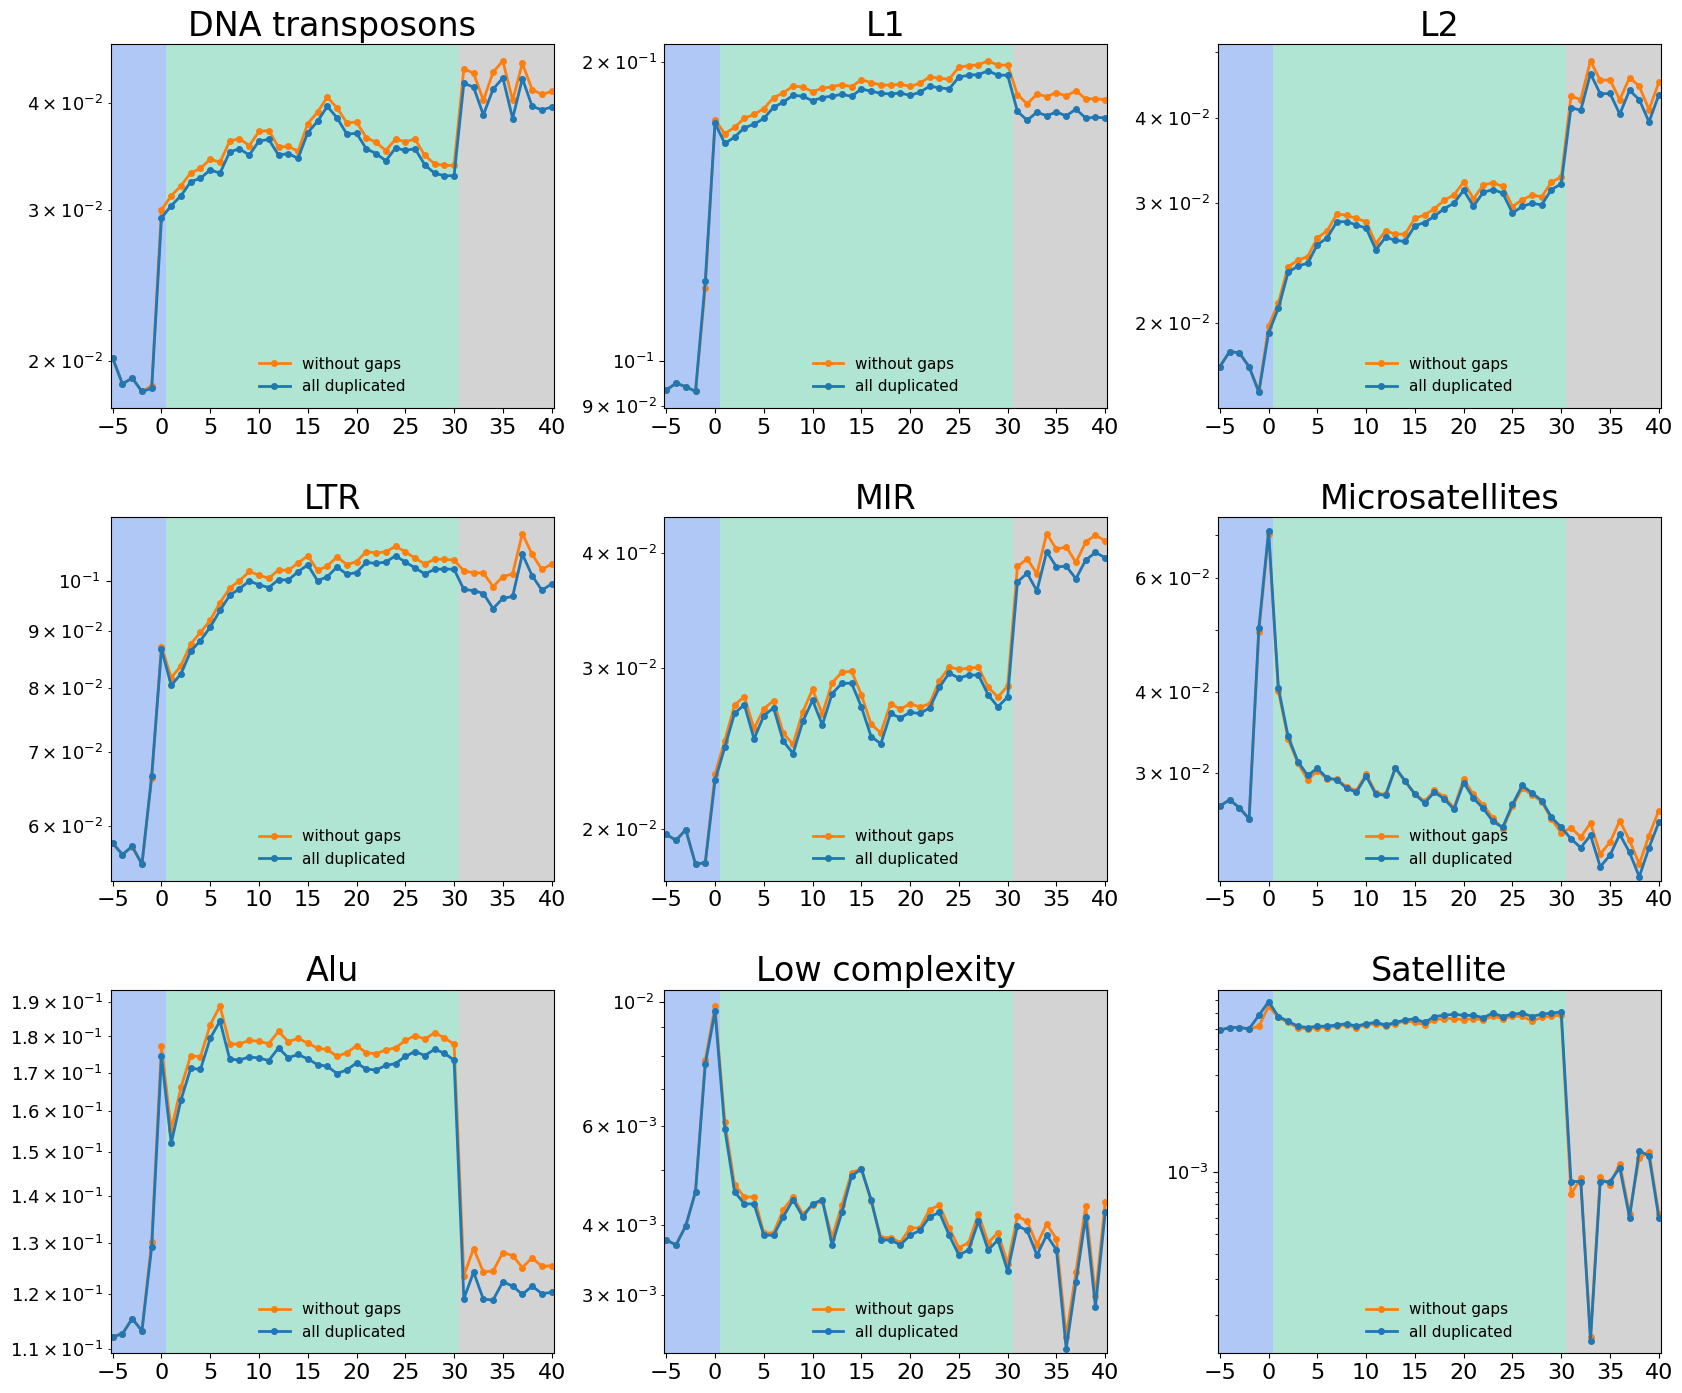

In [171]:
import matplotlib.pyplot as plt


titles = ["DNA transposons", "L1", "L2", "LTR", "MIR", 
          "Microsatellites", "Alu", "Low complexity", "Satellite"]
plot_several_repeats(pieces, ["DNA", "L1", "L2", "LTR", "MIR",
            "Simple_repeat", "Alu", "Low_complexity", "Real_satellite"], titles, (3,3), (20,17), 0.025);

# Predicting features affecting duplication rates

In [29]:
# ~36% of variance in duplications number is explained by genomic features.

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
import warnings
warnings.filterwarnings("ignore")

X, y = np.array(piece_out.loc[:, ~piece_out.columns.isin(['chr', 'coor_s', 'coor_e', 'ids', 'length', 'jumps'])], float), np.array(piece_out["jumps"], float)
clf = RandomForestRegressor(max_depth=5, n_estimators=100, oob_score=True)

for n in range(3):
    strat_k_fold = StratifiedKFold(n_splits=5, shuffle=True, random_state=n)
    cv_results = cross_val_score(clf, X, y, cv=strat_k_fold)
    print("Mean:", np.mean(cv_results))


Mean: 0.3665503556403076
Mean: 0.35729949952021595
Mean: 0.3746531485542032


In [52]:
# Long run, change permutation number.
# Try more perms; it takes 15 mins per sample per 100 permutations.

significant_association_with_jumps(piece_out, perm=30)

All columns: ['length' 'centro' 'telo' 'gaps' 'genes' 'intra_frac' 'cpgisl_in'
 'cpgisl_bor' 'ctcf' 'repli_in' 'repli_bor' 'repli_bor_deriv'
 'repli_deriv' 'recomb_in' 'recomb_bor' 'dnase_in' 'dnase_bor' 'DNA'
 'LINE' 'LTR' 'SINE' 'Low_complexity' 'Retroposon' 'Satellite'
 'Simple_repeat' 'rRNA' 'snRNA' 'scRNA' 'srpRNA' 'tRNA' 'RC' 'L1' 'L2'
 'MIR' 'Alu' 'Real_satellite' 'CG_frac' 'telocent_dist']
Significant: ['length' 'genes' 'intra_frac' 'cpgisl_in' 'repli_deriv']
Corresponding p-adjusted (BH): [0. 0. 0. 0. 0.]


In [46]:
piece_out.insert(0, 'jumps', piece_out.pop('jumps'))
piece_out.loc[:, ~piece_out.columns.isin(['chr', 'coor_s', 'coor_e', 'ids'])].corr(method='spearman')

,jumps,length,centro,telo,gaps,genes,intra_frac,cpgisl_in,cpgisl_bor,ctcf,repli_in,repli_bor,repli_bor_deriv,repli_deriv,recomb_in,recomb_bor,dnase_in,dnase_bor,DNA,LINE,LTR,SINE,Low_complexity,Retroposon,Satellite,Simple_repeat,rRNA,snRNA,scRNA,srpRNA,tRNA,RC,L1,L2,MIR,Alu,Real_satellite,CG_frac,telocent_dist
jumps,1.000000,0.308703,-0.101278,0.031293,0.205751,0.106348,-0.167828,0.273215,-0.002819,-0.018786,0.020351,0.027605,-0.022330,0.149235,-0.039746,-0.039905,0.033530,0.025699,-0.012137,0.034311,0.027754,0.042840,0.011220,0.009064,0.093980,0.080094,0.032355,0.031936,NaN,0.021934,-0.007205,NaN,0.041938,-0.023919,-0.013960,0.048086,0.048682,-0.060663,-0.065046
length,0.308703,1.000000,-0.223031,-0.041744,0.238819,0.181068,0.093993,0.397722,-0.017348,-0.020418,0.036844,0.045895,-0.036481,0.174280,-0.011165,-0.011243,0.105848,0.013764,-0.005739,0.088312,0.105718,0.182280,-0.015335,0.022474,0.150703,-0.034912,0.018455,0.015209,NaN,0.030678,-0.018581,NaN,0.094298,0.007695,0.002154,0.194188,0.088141,0.074631,-0.246666
centro,-0.101278,-0.223031,1.000000,-0.284394,-0.112459,0.051749,-0.018237,-0.080382,0.032646,0.020481,0.016515,0.014034,0.149509,-0.073142,0.161249,0.161432,-0.022435,-0.027742,0.016699,-0.049629,-0.027497,-0.090918,0.000372,-0.026934,-0.151260,-0.003887,0.007752,-0.013819,NaN,0.001597,-0.004807,NaN,-0.057896,0.010048,0.029265,-0.108365,-0.042786,0.056909,0.438001
telo,0.031293,-0.041744,-0.284394,1.000000,-0.071471,-0.047382,-0.084454,-0.082714,-0.068271,-0.021537,-0.138307,-0.136010,-0.090951,-0.007201,-0.450424,-0.450467,0.014834,0.046199,0.015709,0.072405,-0.016624,-0.036334,0.003894,0.021352,0.018874,-0.000572,-0.015195,0.015607,NaN,-0.011518,-0.007429,NaN,0.067156,0.019280,-0.012761,-0.034102,0.008442,-0.195522,0.511343
gaps,0.205751,0.238819,-0.112459,-0.071471,1.000000,0.049167,-0.049177,0.226155,-0.008990,-0.021565,0.042084,0.055482,-0.170896,0.142636,0.023537,0.023574,0.050936,0.047241,-0.028305,-0.030202,-0.007765,-0.049021,-0.017142,-0.015688,0.117338,0.014183,0.105283,-0.006667,NaN,0.038369,-0.002107,NaN,-0.020684,-0.024319,-0.018771,-0.043722,0.040900,-0.232519,-0.169767
genes,0.106348,0.181068,0.051749,-0.047382,0.049167,1.000000,0.001483,0.298337,0.043888,-0.002631,0.125311,0.130798,0.161317,0.122314,0.031236,0.031202,0.055992,-0.007949,-0.002465,-0.066758,-0.088781,0.015267,-0.028456,0.004753,-0.063194,-0.059002,-0.004831,0.012725,NaN,0.002098,-0.012868,NaN,-0.075396,0.014606,0.004317,0.015257,-0.031522,0.041608,0.028232
intra_frac,-0.167828,0.093993,-0.018237,-0.084454,-0.049177,0.001483,1.000000,0.030797,0.008072,0.007940,0.011505,0.010635,0.031981,0.009684,0.016009,0.016156,0.006520,-0.006015,0.004928,0.000902,0.039459,0.120452,-0.024509,0.003460,-0.055815,-0.051537,-0.001426,-0.005373,NaN,-0.000056,-0.019200,NaN,0.003388,0.004778,0.026883,0.120000,-0.020645,0.175345,-0.111089
cpgisl_in,0.273215,0.397722,-0.080382,-0.082714,0.226155,0.298337,0.030797,1.000000,0.368616,-0.014072,0.079447,0.088496,0.034613,0.219407,0.022456,0.022249,0.094577,0.007974,-0.024285,-0.020694,0.003057,0.073212,0.006438,0.024863,0.071862,-0.004422,0.050464,0.012101,NaN,0.026698,-0.005796,NaN,-0.018168,-0.007388,-0.025348,0.086188,0.036276,0.154019,-0.163062
cpgisl_bor,-0.002819,-0.017348,0.032646,-0.068271,-0.008990,0.043888,0.008072,0.368616,1.000000,0.010540,0.011495,0.011860,0.002098,-0.000737,0.038024,0.037230,-0.004006,-0.006284,-0.041961,-0.078255,-0.054164,-0.064385,0.009682,-0.002396,-0.013441,-0.001829,-0.006748,0.011327,NaN,-0.004416,-0.002549,NaN,-0.073556,-0.028927,-0.018077,-0.059718,-0.015103,0.219779,-0.055569
ctcf,-0.018786,-0.020418,0.020481,-0.021537,-0.021565,-0.002631,0.007940,-0.014072,0.010540,1.000000,0.095801,0.094590,0.112415,-0.026007,0.014345,0.014364,0.096867,0.033267,0.010469,-0.001721,-0.018872,0.001499,-0.007688,-0.003547,0.006339,-0.002151,-0.005157,0.043864,NaN,-0.003375,-0.001948,NaN,-0.001972,-0.000501,0.004577,-0.001573,0.019763,0.025130,0.008131


In [56]:
import warnings
warnings.filterwarnings('ignore')

from sklearn import preprocessing
from pingouin import partial_corr

df_in = piece_out.loc[:, ~piece_out.columns.isin(['chr', 'coor_s', 'coor_e', 'ids'])]
df_in = df_in.drop(['telocent_dist', 'Retroposon', 'scRNA', 'RC', 'snRNA', 'srpRNA', 'tRNA', 'rRNA', 'LINE', 'SINE', 'Satellite'], axis=1)
cols = list(df_in.columns)
cols.remove("jumps")

for i, val in enumerate(cols):
    other = cols[:i] + cols[i+1:]
    cor = partial_corr(data=df_in, x='jumps', y=val, covar=other, method='spearman')
    pvas_adj = cor['p-val'][0]
    print(f"{val}, {cor.r[0]}, {pvas_adj}, {'yes' if pvas_adj < 0.01/len(cols) else ''}")


length, 0.19539731826562642, 4.692197873570378e-58, yes
centro, -0.01395285450346534, 0.25597764636688713, 
telo, 0.024602600563370353, 0.04515715760567225, 
gaps, 0.08991936131454942, 2.2147505223834084e-13, yes
genes, 0.013484240341030814, 0.27229418283620577, 
intra_frac, -0.1920101502482959, 4.3767215507408375e-56, yes
cpgisl_in, 0.15243454739586101, 9.287336948820187e-36, yes
cpgisl_bor, -0.05073260824844717, 3.5840883260439156e-05, yes
ctcf, -0.00555391451327161, 0.6511647702237356, 
repli_in, -0.018512242156582353, 0.1317592043859192, 
repli_bor, 0.01651846045231866, 0.17867346116489363, 
repli_bor_deriv, 0.02141148967559868, 0.08128163998184748, 
repli_deriv, 0.061822298388336985, 4.7106352218043035e-07, yes
recomb_in, 0.012471333524099123, 0.3099514089823557, 
recomb_bor, -0.012768572486032652, 0.29856065997225867, 
dnase_in, -0.02463363931720259, 0.04488660161107488, 
dnase_bor, 0.021486788643682697, 0.08021675529328647, 
DNA, -0.0014537954566021614, 0.9057881513586595, 
LTR,

# Enrichment at SD breakpoints

gaps, (sign. more): 0.018780048076923076 0.0014719941317565544
genes, (sign. more): 0.7484975961538461 0.6832398441848239
cpgisl_in, (sign. more): 0.38686899038461536 0.24897376947413824
cpgisl_bor, (sign. more): 0.022310697115384616 0.010217891315610312
ctcf, NOTHING
repli_in, (sign. more): 20.982453725961538 16.92194625592594
repli_bor, (sign. more): 10.549169546274037 8.460242785892675
repli_bor_deriv, (sign. more): 9.9873046875 8.214567461657508
repli_deriv, (sign. more): 3.884957932692307 3.397479555489703
recomb_in, NOTHING
recomb_bor, NOTHING
dnase_in, NOTHING
dnase_bor, (sign. more): 19.70603102463942 19.543624459653508
CG_frac_in, (sign. more): 0.43849797736712254 0.41066400174988654
CG_frac, (sign. less): 0.39762824025350013 0.40658540038343954
DNA, (sign. less): 0.029371995192307692 0.03699030472604714
LINE, (sign. less): 0.19621394230769232 0.2258693493462437
LTR, (sign. less): 0.08668870192307693 0.092961468864525
SINE, (sign. more): 0.197265625 0.17511405073569591
Low_com

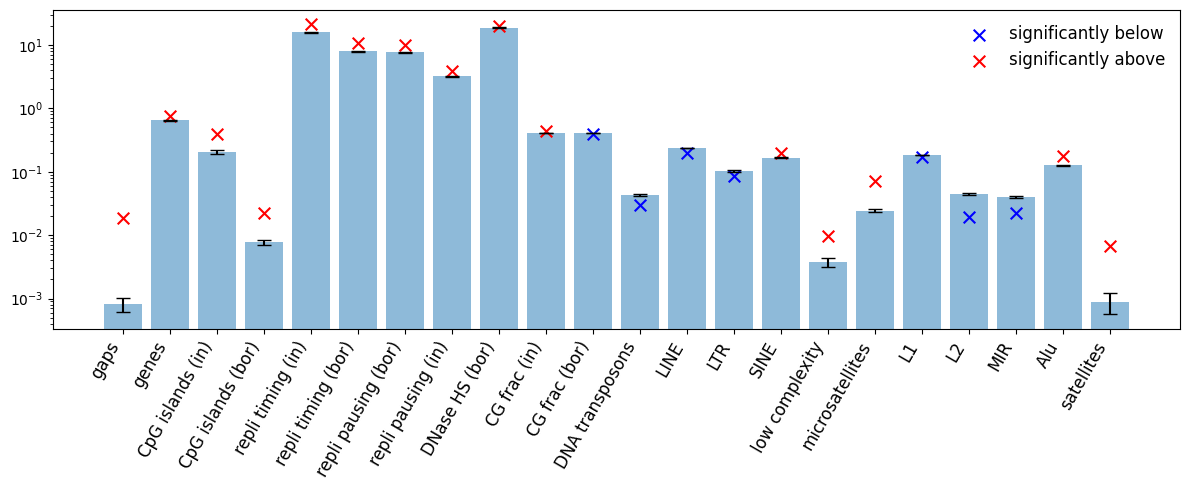

In [134]:
# Plot enrichment of genomic features in/flanking duplicated regions
# We compare distributions of duplicated regions with random genomic intevals

import matplotlib.pyplot as plt

ms, stds, vals, labels, colors = breakpoints_enrichment(piece_out, pieces)

x_pos = np.array(range(len(ms)))
fig, ax = plt.subplots(figsize=(12,5))
ax.bar(x_pos, ms, yerr=stds, align='center', alpha=0.5, ecolor='black', capsize=5, width=0.8)
ax.scatter(x_pos[colors == "b"], vals[colors == "b"], color="b", marker="x", s=70)
ax.scatter(x_pos[colors == "r"], vals[colors == "r"], color="r", marker="x", s=70)
ax.set_yscale('log')
ax.set_xticks(x_pos)

indices_change = [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 15, 16, 21]
new_labels = ["CpG islands (in)", "CpG islands (bor)", "repli timing (in)", "repli timing (bor)",
              "repli pausing (bor)", "repli pausing (in)", "DNase HS (bor)",
              "CG frac (in)", "CG frac (bor)", "DNA transposons", 
              "low complexity", "microsatellites", "satellites"]

for i in range(len(indices_change)):
    labels[indices_change[i]] = new_labels[i]

ax.set_xticklabels(labels, rotation=60, fontsize=12, ha="right")
ax.legend(['significantly below', 'significantly above'], frameon=False, fontsize=12);
plt.tight_layout();

gaps, (sign. more): 0.018780048076923076 0.0014719941317565544
genes, (sign. more): 0.7484975961538461 0.6832398441848239
cpgisl_in, (sign. more): 0.38686899038461536 0.24897376947413824
cpgisl_bor, (sign. more): 0.022310697115384616 0.010217891315610312
ctcf, NOTHING
repli_in, (sign. more): 20.982453725961538 16.92194625592594
repli_bor, (sign. more): 10.549169546274037 8.460242785892675
repli_bor_deriv, (sign. more): 9.9873046875 8.214567461657508
repli_deriv, (sign. more): 3.884957932692307 3.397479555489703
recomb_in, NOTHING
recomb_bor, NOTHING
dnase_in, NOTHING
dnase_bor, (sign. more): 19.70603102463942 19.543624459653508
CG_frac_in, (sign. more): 0.43849797736712254 0.41066400174988654
CG_frac, (sign. less): 0.39762824025350013 0.40658540038343954
DNA, (sign. less): 0.029371995192307692 0.03699030472604714
LINE, (sign. less): 0.19621394230769232 0.2258693493462437
LTR, (sign. less): 0.08668870192307693 0.092961468864525
SINE, (sign. more): 0.197265625 0.17511405073569591
Low_com

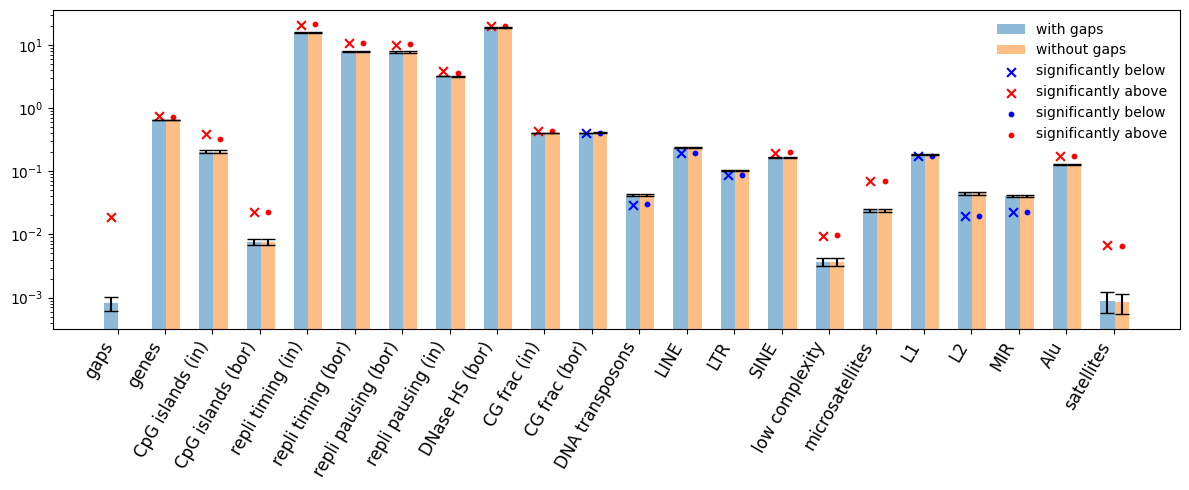

In [136]:
# Plot enrichment of genomic features in/flanking duplicated regions
# We compare all duplicated regions with those without any assembly gaps at flanks 

import matplotlib.pyplot as plt

ms, stds, vals, labels, colors = breakpoints_enrichment(piece_out, pieces)

x_pos = np.array(range(len(ms)))
fig, ax = plt.subplots(figsize=(12,5))
ax.bar(x_pos, ms, yerr=stds, align='center', alpha=0.5, ecolor='black', capsize=5, width=0.3, label = "with gaps")
ax.scatter(x_pos[colors == "b"], vals[colors == "b"], color="b", marker="x", s=40, label = 'significantly below')
ax.scatter(x_pos[colors == "r"], vals[colors == "r"], color="r", marker="x", s=40, label = 'significantly above')

ms, stds, vals, labels, colors = breakpoints_enrichment(piece_out, pieces, mode="nogaps")

x_pos = np.array(range(len(ms))) + 0.3
ax.bar(x_pos, ms, yerr=stds, align='center', alpha=0.5, ecolor='black', capsize=5, width=0.3, label = "without gaps")
ax.scatter(x_pos[colors == "b"], vals[colors == "b"], color="b", marker=".", s=40, label = 'significantly below')
ax.scatter(x_pos[colors == "r"], vals[colors == "r"], color="r", marker=".", s=40, label = 'significantly above')
ax.set_yscale('log')
ax.set_xticks(x_pos - 0.17)

indices_change = [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 15, 16, 21]
new_labels = ["CpG islands (in)", "CpG islands (bor)", "repli timing (in)", "repli timing (bor)",
              "repli pausing (bor)", "repli pausing (in)", "DNase HS (bor)",
              "CG frac (in)", "CG frac (bor)", "DNA transposons", 
              "low complexity", "microsatellites", "satellites"]

for i in range(len(indices_change)):
    labels[indices_change[i]] = new_labels[i]

handles, legends = ax.get_legend_handles_labels()
order = [4, 5, 0, 1, 2, 3]

ax.set_xticklabels(labels, rotation=60, fontsize=12, ha="right")
ax.legend([handles[idx] for idx in order], [legends[idx] for idx in order], frameon=False, fontsize=10);
plt.tight_layout();

In [97]:
# only 3% of duplicated regions are flanked with assembly gaps

from collections import Counter

Counter(piece_out["gaps"])

Counter({0: 6465, 1: 132, 2: 59})